Importing Necessary Libraries

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
import numpy as np

Load The dataset

In [20]:
df=pd.read_csv("indian-national-level-election.csv")

Exploatory data Analysis

1 ) Display The Shape of the dataset

In [21]:
print("The Shape of the Data set : ",df.shape)

The Shape of the Data set :  (73081, 11)


2 ) Display the Attributes and Data types in the dataset

In [22]:
print("The Data Types of The Attributes are\n\n",df.dtypes)

The Data Types of The Attributes are

 st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object


3 ) Display The Each Parliment Constitution Victorier Person in Each election

In [23]:
max_votes_index = df.groupby(['year', 'pc_name'])['totvotpoll'].idxmax()
max_votes_parties = df.loc[max_votes_index, ['year', 'pc_name', 'partyabbre', 'totvotpoll']]

print(max_votes_parties)


       year                         pc_name partyabbre  totvotpoll
230    1977                        Adilabad        INC      167410
26001  1977                           Adoor        CPI      227939
54809  1977                            Agra        BLD      257472
15633  1977                       Ahmedabad        INC      187715
33241  1977                      Ahmednagar        INC      179550
...     ...                             ...        ...         ...
38715  2014                          Wardha        BJP      537518
27595  2014                         Wayanad        INC      377035
42001  2014  West Delhi                            BJP      651395
38858  2014                 Yavatmal-Washim        SHS      477905
4759   2014                       Zahirabad        TRS      508661

[5901 rows x 4 columns]


4 ) Display The Election Results in Each year

In [24]:
party_counts = max_votes_parties.groupby(['year', 'partyabbre']).size()

party_counts = party_counts.reset_index(name='count')

print(party_counts)

     year partyabbre  count
0    1977        ADK     18
1    1977        BLD    292
2    1977        CPI      7
3    1977        CPM     22
4    1977        DMK      2
..    ...        ...    ...
323  2014         SP      5
324  2014        SWP      1
325  2014        TDP     16
326  2014        TRS     11
327  2014      YSRCP      9

[328 rows x 3 columns]


In [25]:
Year = int(input("Enter The Year : "))
year_counts = party_counts[party_counts['year'] == Year]
sorted_party_counts = year_counts.sort_values(by='count', ascending=False)
print(sorted_party_counts)

     year partyabbre  count
300  2014        BJP    279
304  2014        INC     44
294  2014       ADMK     37
297  2014       AITC     34
299  2014        BJD     20
322  2014        SHS     18
325  2014        TDP     16
326  2014        TRS     11
327  2014      YSRCP      9
303  2014        CPM      9
313  2014        LJP      6
314  2014        NCP      6
323  2014         SP      5
320  2014        SAD      4
318  2014        RJD      4
292  2014       AAAP      4
305  2014        IND      3
301  2014       BLSP      3
298  2014      AIUDF      3
310  2014      JKPDP      3
307  2014       IUML      2
306  2014       INLD      2
309  2014      JD(U)      2
311  2014        JMM      2
293  2014         AD      2
308  2014      JD(S)      2
312  2014     KEC(M)      1
315  2014       NPEP      1
316  2014        NPF      1
317  2014        PMK      1
319  2014        RSP      1
302  2014        CPI      1
321  2014        SDF      1
324  2014        SWP      1
296  2014      AINRC

6 ) Display the heatmap

After removing the Unnecessary Attributes The Remaining Attributes in The Dataset are

 st_name       object
year           int64
pc_no          int64
cand_sex      object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object
   st_name  year  pc_no  cand_sex  partyabbre  totvotpoll  electors
0        0  1977      1         1         414       25168     85308
1        0  1977      1         1         410       35400     85308
2        0  1980      1         1         414         109     96084
3        0  1980      1         1         414         125     96084
4        0  1980      1         1         414         405     96084


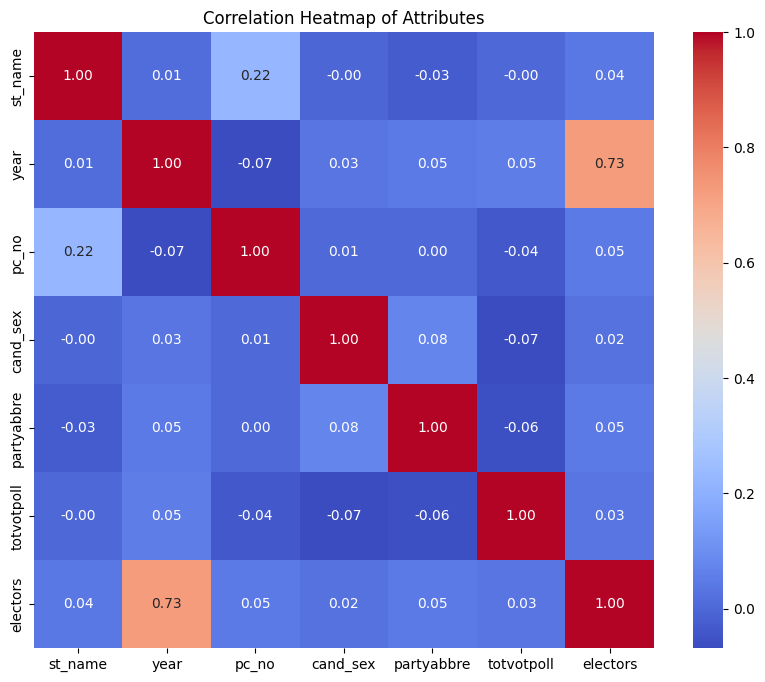

In [26]:
df=df.drop(columns=['pc_name','pc_type','cand_name','partyname'])
print("After removing the Unnecessary Attributes The Remaining Attributes in The Dataset are\n\n",df.dtypes)

label_encoder = LabelEncoder()

df['st_name'] = label_encoder.fit_transform(df['st_name'])
df['partyabbre'] = label_encoder.fit_transform(df['partyabbre'])
df['cand_sex'] = label_encoder.fit_transform(df['cand_sex'])
print(df.head())

import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Attributes')
plt.show()


7 ) Display The Correlation Graph between Each Attributes

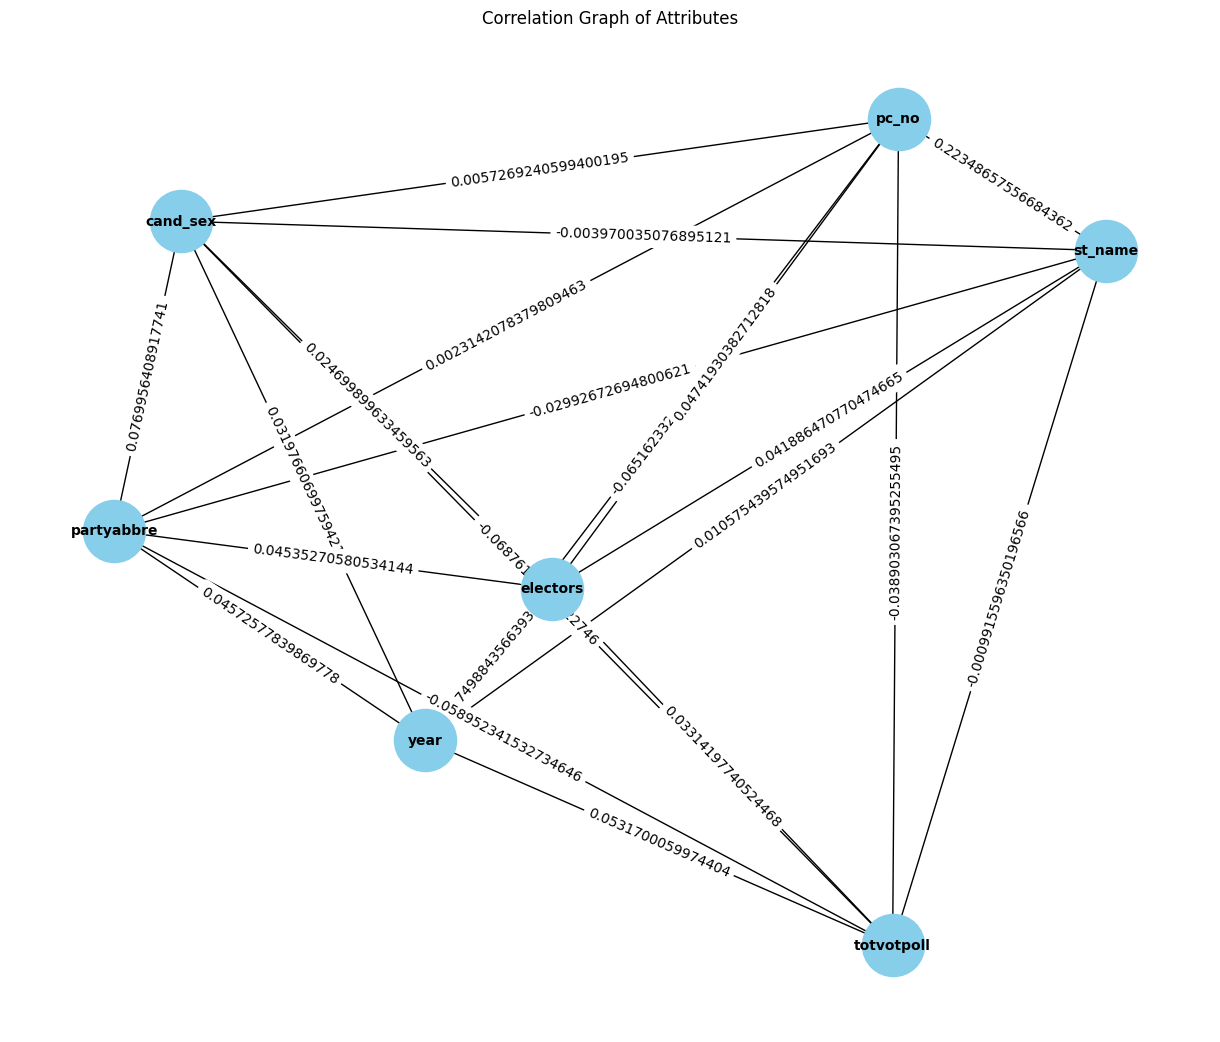

In [27]:
import networkx as nx

attributes_to_scale = df.columns.tolist()
G = nx.Graph()

for i, attribute1 in enumerate(attributes_to_scale):
    for j, attribute2 in enumerate(attributes_to_scale):
        if i != j:
            correlation = df[attribute1].corr(df[attribute2])
            G.add_edge(attribute1, attribute2, weight=correlation)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Correlation Graph of Attributes')
plt.show()


8 ) Correlation between Attributes and Label

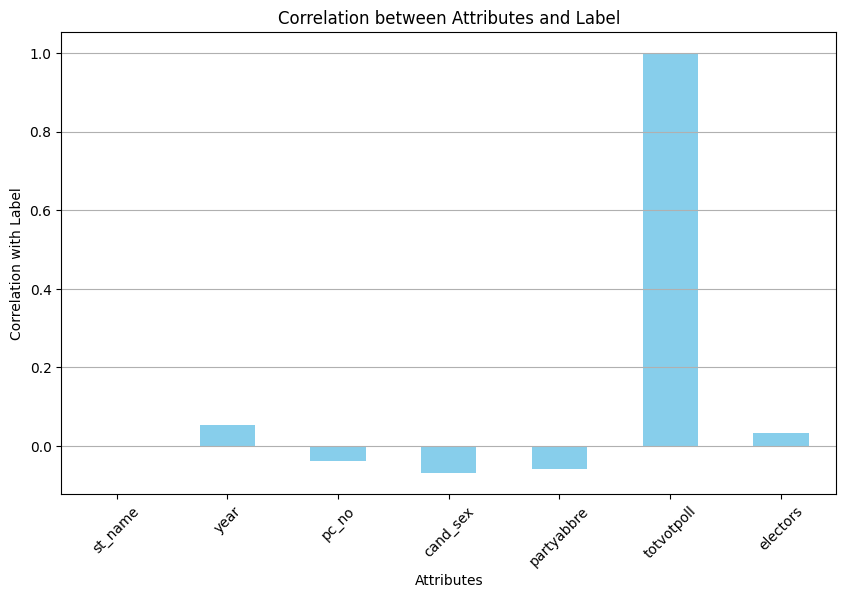

In [28]:

attribute_label_correlations = df.corrwith(df['totvotpoll'])

plt.figure(figsize=(10, 6))
attribute_label_correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation between Attributes and Label')
plt.xlabel('Attributes')
plt.ylabel('Correlation with Label')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Data Preprocessing

1 ) Handling  Missing Values in the Dataset

In [29]:
print("The Missing Values in the Dataset\n\n",df.isnull().sum())

The Missing Values in the Dataset

 st_name       0
year          0
pc_no         0
cand_sex      0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


In [30]:
most_frequent_train_gender = df['cand_sex'].mode()[0]
df['cand_sex'] = df['cand_sex'].fillna(most_frequent_train_gender)

In [31]:
print("The Missing Values in the Dataset\n\n",df.isnull().sum())

The Missing Values in the Dataset

 st_name       0
year          0
pc_no         0
cand_sex      0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


2 ) Converting The categorical values into Numerical Values

In [32]:
label_encoder = LabelEncoder()

#df['st_name'] = label_encoder.fit_transform(df['st_name'])
#df['partyabbre'] = label_encoder.fit_transform(df['partyabbre'])
#df['cand_sex'] = label_encoder.fit_transform(df['cand_sex'])
print(df.head())

   st_name  year  pc_no  cand_sex  partyabbre  totvotpoll  electors
0        0  1977      1         1         414       25168     85308
1        0  1977      1         1         410       35400     85308
2        0  1980      1         1         414         109     96084
3        0  1980      1         1         414         125     96084
4        0  1980      1         1         414         405     96084


3 ) Normalization

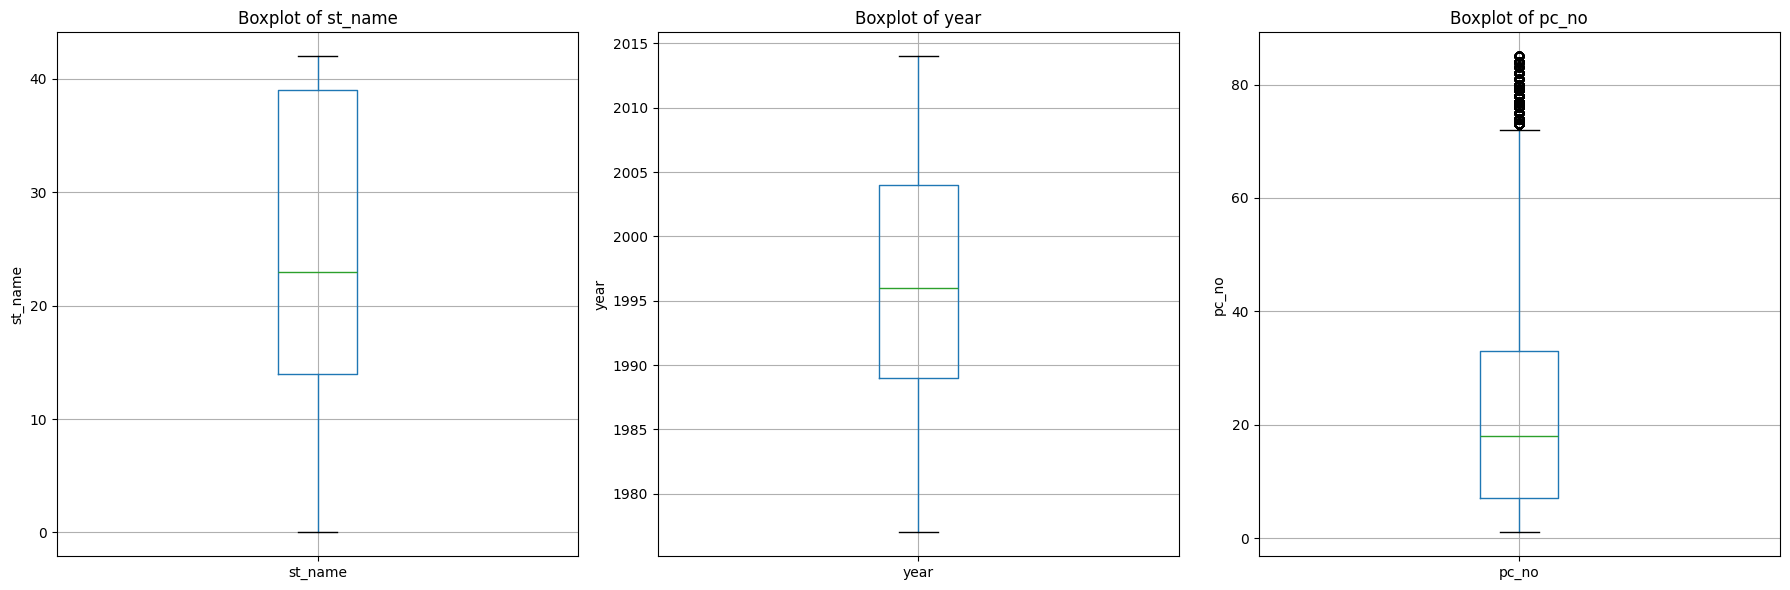

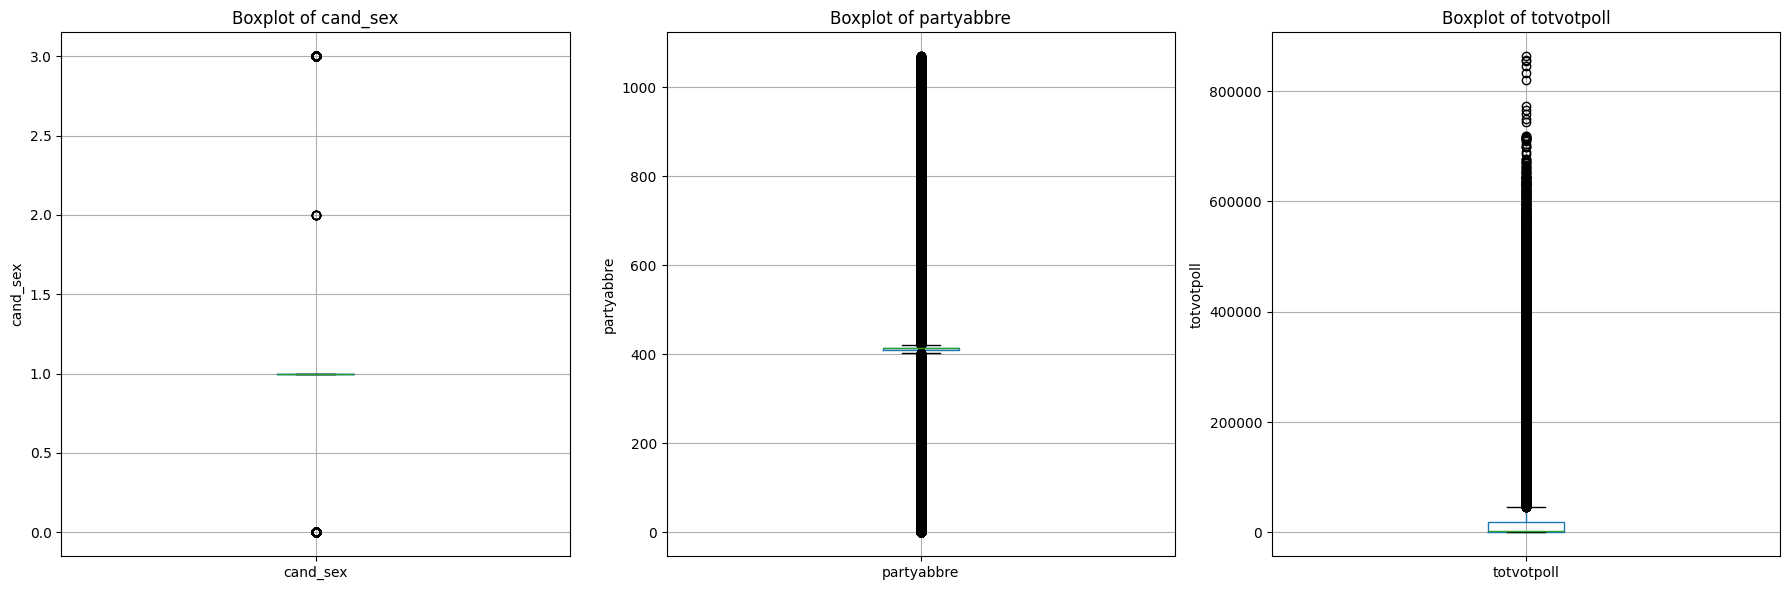

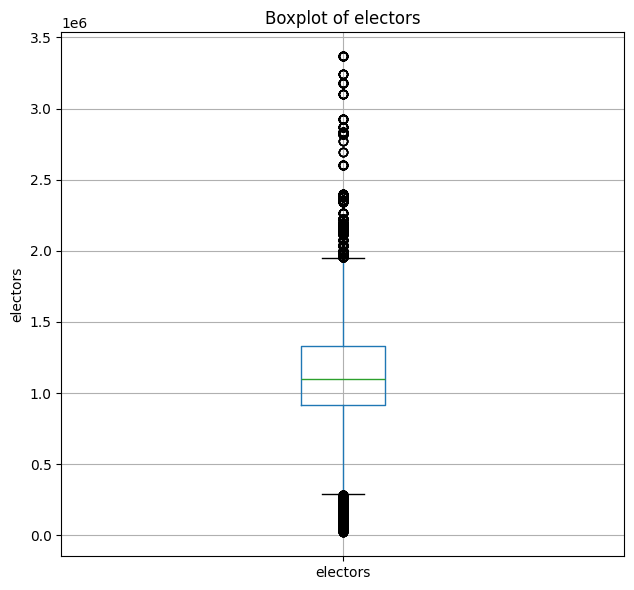

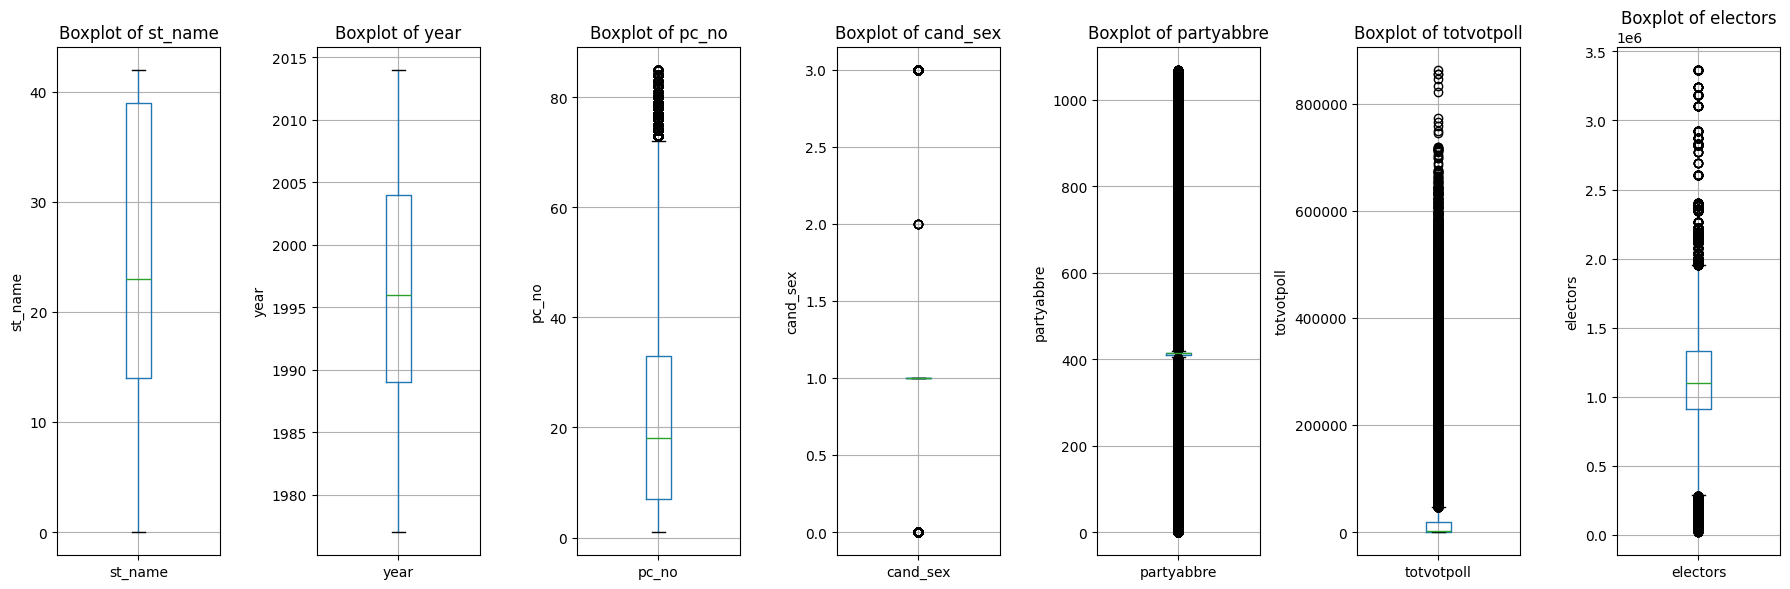

In [33]:
attributes_to_scale = df.columns.tolist()

attributes_per_line = 3

total_rows = (len(attributes_to_scale) + attributes_per_line - 1) // attributes_per_line

for row in range(total_rows):
    plt.figure(figsize=(18, 6))
    start_index = row * attributes_per_line
    end_index = min((row + 1) * attributes_per_line, len(attributes_to_scale))
    for idx, attribute in enumerate(attributes_to_scale[start_index:end_index], start=1):
        plt.subplot(1, attributes_per_line, idx)
        df.boxplot(column=attribute)
        plt.title(f'Boxplot of {attribute}')
        plt.ylabel(attribute)
        plt.grid(True)
    plt.tight_layout()
    plt.show()
plt.figure(figsize=(18, 6))
for idx, attribute in enumerate(attributes_to_scale, start=1):
    plt.subplot(1, len(attributes_to_scale), idx)
    df.boxplot(column=attribute)
    plt.title(f'Boxplot of {attribute}')
    plt.ylabel(attribute)
    plt.grid(True)
plt.tight_layout()
plt.show()



In [34]:
attributes_to_scale = ['electors']

min_max_scaler = MinMaxScaler()
data_normalized = df.copy()
df[attributes_to_scale] = min_max_scaler.fit_transform(data_normalized[attributes_to_scale])

Feature Engineering Technique

1 ) Remove the Unnecessary data from dataset
2 ) Select K best with K=3,4,5,6
3 ) PCA
4 ) LDA

1 ) Remove the Unnecessary data from dataset

In [35]:
#df=df.drop(columns=['pc_name','pc_type','cand_name','partyname'])
print("After removing the Unnecessary Attributes The Remaining Attributes in The Dataset are\n\n",df.dtypes)

After removing the Unnecessary Attributes The Remaining Attributes in The Dataset are

 st_name         int32
year            int64
pc_no           int64
cand_sex        int32
partyabbre      int32
totvotpoll      int64
electors      float64
dtype: object


In [36]:
test=[]
prediction=[]

2 )Select K best with K=3,4,5

RandomForestRegressor Model1

In [37]:
x=df.drop(columns=["totvotpoll"])
y=df['totvotpoll']
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['year', 'cand_sex', 'partyabbre'], dtype='object')


In [38]:
X = df[selected_features]  
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)

print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

Mean Squared Error  :  3751661185.88
R-squared Value     :  0.6579880032982834
Accuracy Percentage :  65.8 %


KeyboardInterrupt: 

RandomForestRegressor Model2

In [ ]:
x=df.drop(columns=["totvotpoll"])
y=df['totvotpoll']
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['year', 'pc_no', 'cand_sex', 'partyabbre'], dtype='object')


Mean Squared Error  :  4116258138.62
R-squared Value     :  0.6247503185455219
Accuracy Percentage :  62.48 %


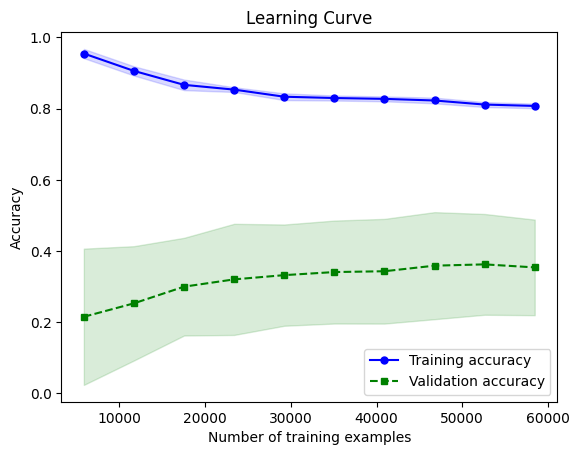

In [ ]:

X = df[selected_features]  
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)

print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()


RandomForestRegressor Model3

In [ ]:
x=df.drop(columns=["totvotpoll"])
y=df['totvotpoll']
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['year', 'pc_no', 'cand_sex', 'partyabbre', 'electors'], dtype='object')


Mean Squared Error  :  3362184729.95
R-squared Value     :  0.6934937736124005
Accuracy Percentage :  69.35 %


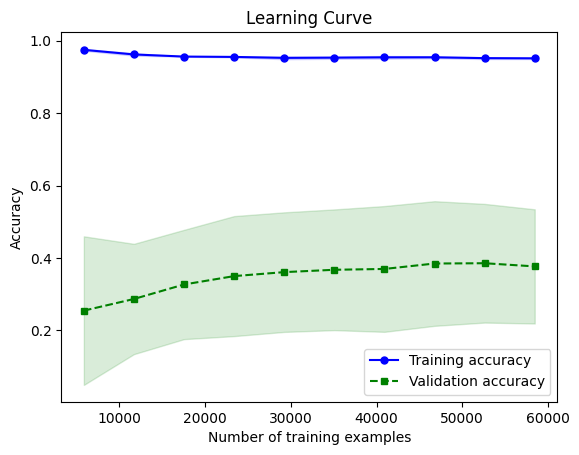

In [ ]:
X = df[selected_features]  
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)

print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()


RandomForestRegressor Model4

In [ ]:
x=df.drop(columns=["totvotpoll"])
y=df['totvotpoll']
selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

X = df[selected_features] 
print(X.head)

Selected Features:
Index(['st_name', 'year', 'pc_no', 'cand_sex', 'partyabbre', 'electors'], dtype='object')
<bound method NDFrame.head of        st_name  year  pc_no  cand_sex  partyabbre  electors
0            0  1977      1         1         414  0.019659
1            0  1977      1         1         410  0.019659
2            0  1980      1         1         414  0.022877
3            0  1980      1         1         414  0.022877
4            0  1980      1         1         414  0.022877
...        ...   ...    ...       ...         ...       ...
73076       42  2014     42         3         672  0.440624
73077       42  2014     42         1         410  0.440624
73078       42  2014     42         1         184  0.440624
73079       42  2014     42         1         300  0.440624
73080       42  2014     42         0          81  0.440624

[73081 rows x 6 columns]>


Mean Squared Error  :  1504170913.24
R-squared Value     :  0.8628755444779936
Accuracy Percentage :  86.29 %


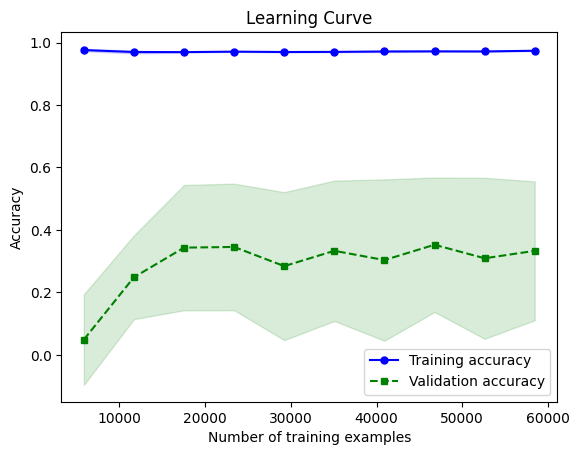

In [ ]:
X = df[selected_features]  
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)

print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

3 ) RandomForestRegressor Model5 Using PCA 

In [ ]:
pca = PCA(n_components=5)  

pca.fit(x)

x_pca = pca.transform(x)

print("Selected Features (Principal Components):")
print(x_pca.shape)  


Selected Features (Principal Components):
(73081, 5)


Mean Squared Error  :  2055588563.91
R-squared Value     :  0.8126067588982202
Accuracy Percentage :  81.26 %


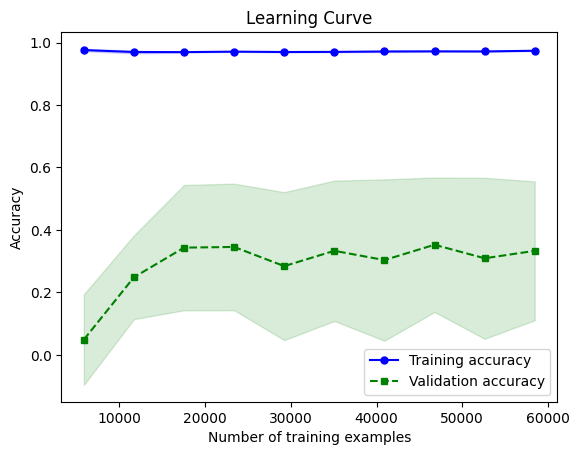

In [ ]:
x = pd.DataFrame(x_pca) 
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)


print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

4 ) RandomForestRegressor Model6 Using LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(x, y)

x_lda = lda.transform(x)

print("Selected Features (Linear Discriminant Components):")
print(x_lda.shape)

Selected Features (Linear Discriminant Components):
(73081, 5)


Mean Squared Error  :  3516979397.51
R-squared Value     :  0.6793822558853142
Accuracy Percentage :  67.94 %
Computational Time of Random Forest Regresssion :  34.56357264518738 seconds


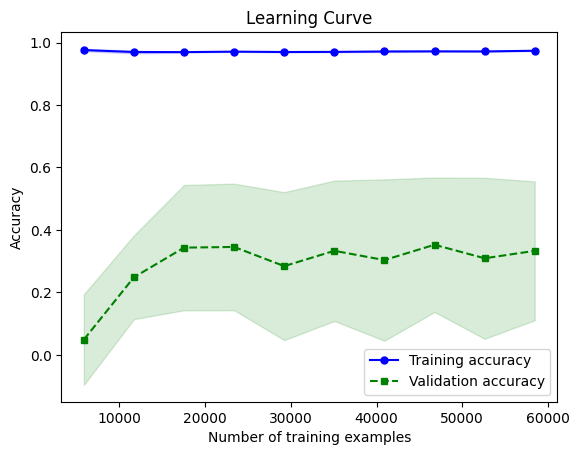

In [ ]:
import time
start_time = time.time()

x = pd.DataFrame(x_lda) 
y = df['totvotpoll']  

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

test.append(y_test)
prediction.append(y_pred)

end_time = time.time()
running_time = end_time - start_time

print("Mean Squared Error  : ", round(mse,2))
print("R-squared Value     : ", r_squared)
print("Accuracy Percentage : ", round(100*r_squared,2,),"%")
print("Computational Time of Random Forest Regresssion : ", running_time, "seconds")

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

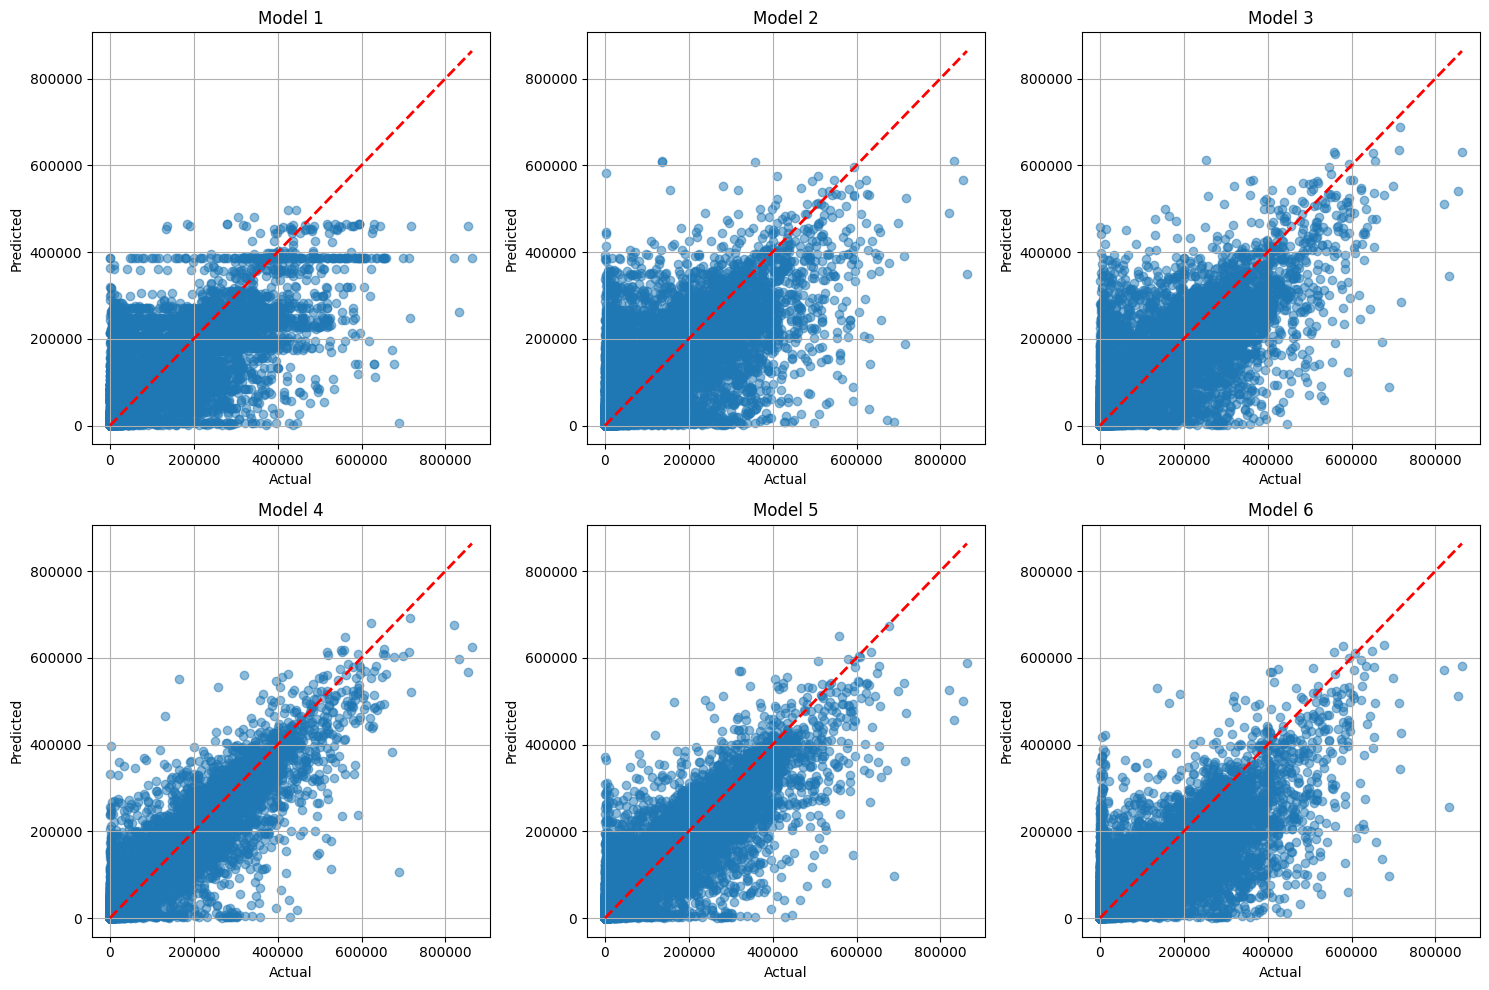

In [ ]:
num_models = len(test)
num_rows = (num_models + 2) // 3 
num_cols = min(num_models, 3) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, (y_test, y_pred) in enumerate(zip(test, prediction)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_models > 1 else axes
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Model {i+1}')
    ax.grid(True)

for i in range(num_models, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
import pickle


file_path = "Model.pkl"

with open(file_path, "wb") as file:
    pickle.dump(df, file)

print(f"Object saved to {file_path}")

Object saved to Model.pkl
